# Understanding the Data

I am going to utilize machine learning into a Vidio data. The data consists 40 indexes. The amount of total elements are 742582. The dataset that I am using is from Vidio sample dataset. The process that I am going to apply is from cleansing until applying machine learning. The main purpose of the Data is for considering the viewer contents. 

In [1]:
pip install shutup

Note: you may need to restart the kernel to use updated packages.


In [2]:
# First of all import all the packages that I need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Next step is uploading the dataset
df= pd.read_csv('C:/Users/Lenovo/Music/vidio/sample.csv', sep= ',',error_bad_lines=False)

b'Skipping line 7655: expected 41 fields, saw 42\n'
b'Skipping line 28027: expected 41 fields, saw 49\nSkipping line 29868: expected 41 fields, saw 42\n'
b'Skipping line 41317: expected 41 fields, saw 49\n'
b'Skipping line 50334: expected 41 fields, saw 42\nSkipping line 57183: expected 41 fields, saw 42\nSkipping line 61465: expected 41 fields, saw 49\n'
b'Skipping line 68522: expected 41 fields, saw 49\nSkipping line 74582: expected 41 fields, saw 42\n'
b'Skipping line 83509: expected 41 fields, saw 42\nSkipping line 94944: expected 41 fields, saw 42\n'
b'Skipping line 130829: expected 41 fields, saw 42\n'
b'Skipping line 163627: expected 41 fields, saw 42\n'
b'Skipping line 185137: expected 41 fields, saw 42\n'
b'Skipping line 197897: expected 41 fields, saw 42\nSkipping line 206057: expected 41 fields, saw 42\n'
b'Skipping line 213623: expected 41 fields, saw 42\nSkipping line 216084: expected 41 fields, saw 42\nSkipping line 227679: expected 41 fields, saw 49\n'
b'Skipping line 25

In [4]:
df.head(3)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,...,1.11.0 (50),NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,...,NaN,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN


The dataset consists of 41 columns. Each row consists specific content_id. Befor going to the cleansing I will consisder which parameter is going to be predicted. The first of all I have to consider wether it is cateogircal or numerical

In [5]:
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
dic_cols

{'hash_content_id': 'cat',
 'hash_play_id': 'cat',
 'hash_visit_id': 'cat',
 'hash_watcher_id': 'cat',
 'hash_film_id': 'cat',
 'hash_event_id': 'cat',
 'is_login': 'cat',
 'playback_location': 'cat',
 'platform': 'cat',
 'play_time': 'cat',
 'end_time': 'cat',
 'referrer': 'cat',
 'average_bitrate': 'num',
 'bitrate_range': 'cat',
 'total_bytes': 'num',
 'buffer_duration': 'num',
 'referrer_group': 'cat',
 'completed': 'cat',
 'utm_source': 'cat',
 'utm_medium': 'cat',
 'utm_campaign': 'cat',
 'player_name': 'cat',
 'has_ad': 'cat',
 'flash_version': 'cat',
 'os_name': 'cat',
 'os_version': 'cat',
 'browser_name': 'cat',
 'browser_version': 'cat',
 'app_name': 'cat',
 'autoplay': 'cat',
 'is_premium': 'cat',
 'app_version': 'cat',
 'city': 'cat',
 'play_duration': 'num',
 'content_type': 'cat',
 'stream_type': 'cat',
 'title': 'cat',
 'category_name': 'cat',
 'film_title': 'cat',
 'season_name': 'cat',
 'genre_name': 'cat'}

In the function I can determine wether it is categorical or numerical data. The purpose is considering which data type is going to be modelled.

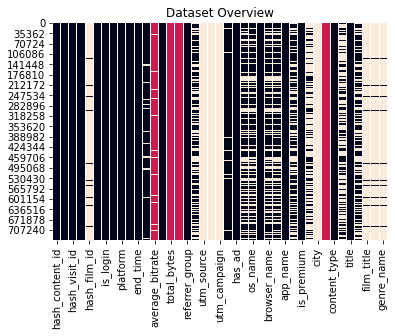

 Categerocial   Numeric   NaN 


In [6]:
heatmap = df.isnull()
for k,v in dic_cols.items():
    if v == "num":
       heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
       heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

From the data, We already check the categorical and numeric aspect in the Dataset. We also detects there are NaN values in the data. The next step is cleansing the data and consider which data is going to used. In the dataset I consider to go with view times, content_type and play_duration

The Data is need to be cleanse before starting with the EDA and visualization. The first things to do is checking the NaN.

In [7]:
df.loc[df['category_name'].isnull()].head()
#Looking for the NaN Value

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
169,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,301c99fe7427924cda2bcc2b75b2fa284bd32cc8bbf360...,114e1ba8db5c4536e60e37dd996ea47c4c49bd39717b20...,5a6cd4d3b0ff67860b30e4fa5cf3de0ab3093c77dd3104...,NaN,0ecba5c9eafab795e1d6c7481803b3e7d56ea8ed2e346d...,False,direct,tv-android,2020-02-14T17:44:17.000Z,...,1.5.0 (28),NaN,15,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN
170,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,3e8daddc4e0fa5c389fb2a4f4b64036c4a3da154c042e2...,632ae4bd02a8a3e5c2f7615b91cdfd09585e6af72457e6...,0f14f6fd48c418a9f5f4860ab0ff52334869341b9acec4...,NaN,fcba49bb9659a8e8fecb529fc9d49e2056817daa2a492d...,True,direct,app-android,2020-02-15T12:25:28.000Z,...,4.24.9-403fc76 (3188606),NaN,180,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN
171,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,4d2ed0fee254f4014a842c62cce193262735cc645b5256...,4cb09bf1bc79967acb51cc038f094c4418ea9b7c61185b...,e563071189f16bbfffc83c1eeb933b624deab248e70898...,NaN,3a62c8c365d15e51c0cd6d15f098f6eb43ab02ba3fdd70...,True,direct,app-android,2020-02-15T02:36:53.000Z,...,4.23.13-b3b0f90 (3188596),NaN,15,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN
172,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,6292683b77dc3751bd708be592014715c3eb6d3dde6a2f...,670d0a8d6903ca86dd9f182ca64e71c8fc6174fcedb600...,232c20714dc190d89ff7210dc80932928180badd11a63e...,NaN,23aa4a9234cf59de2799e9abd206125e74f6bea6b4de3d...,False,direct,web-mobile,2020-02-15T00:50:37.000Z,...,NaN,NaN,0,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN
173,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,75c85b4a9018aad5480d25bdf10381bde66687f47ebc29...,202eb51230fc9cc655c9cca1279e2cd58b4d5bb7923361...,0fb14d16c38774ad76a0446145cce118211420bd7d75c8...,NaN,fae457782250f264df028e674f6817b932ed611eeeed20...,False,direct,tv-android,2020-02-15T12:03:39.000Z,...,1.16.2 (74),NaN,0,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN


In this first attempt I want to predict the category_name. category_name is an categorical type of Data which I can make a classification or clustering later. I found that the NaN values in category_name is about the 30% of the total element in data. So I do more exploration and found a Stream_type index that only have 2 elements NaN and Tv_stream. In the end I consider to make partition with the data so I can keep the other dataset for other exploration 

In [8]:
df1 = df[df['stream_type'] == 'TvStream']
#Partitioning the dataset
df.drop(df.index[df['stream_type'] == 'TvStream'], inplace = True)
#Delete the partitioned part
df1.head()

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
169,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,301c99fe7427924cda2bcc2b75b2fa284bd32cc8bbf360...,114e1ba8db5c4536e60e37dd996ea47c4c49bd39717b20...,5a6cd4d3b0ff67860b30e4fa5cf3de0ab3093c77dd3104...,NaN,0ecba5c9eafab795e1d6c7481803b3e7d56ea8ed2e346d...,False,direct,tv-android,2020-02-14T17:44:17.000Z,...,1.5.0 (28),NaN,15,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN
170,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,3e8daddc4e0fa5c389fb2a4f4b64036c4a3da154c042e2...,632ae4bd02a8a3e5c2f7615b91cdfd09585e6af72457e6...,0f14f6fd48c418a9f5f4860ab0ff52334869341b9acec4...,NaN,fcba49bb9659a8e8fecb529fc9d49e2056817daa2a492d...,True,direct,app-android,2020-02-15T12:25:28.000Z,...,4.24.9-403fc76 (3188606),NaN,180,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN
171,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,4d2ed0fee254f4014a842c62cce193262735cc645b5256...,4cb09bf1bc79967acb51cc038f094c4418ea9b7c61185b...,e563071189f16bbfffc83c1eeb933b624deab248e70898...,NaN,3a62c8c365d15e51c0cd6d15f098f6eb43ab02ba3fdd70...,True,direct,app-android,2020-02-15T02:36:53.000Z,...,4.23.13-b3b0f90 (3188596),NaN,15,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN
172,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,6292683b77dc3751bd708be592014715c3eb6d3dde6a2f...,670d0a8d6903ca86dd9f182ca64e71c8fc6174fcedb600...,232c20714dc190d89ff7210dc80932928180badd11a63e...,NaN,23aa4a9234cf59de2799e9abd206125e74f6bea6b4de3d...,False,direct,web-mobile,2020-02-15T00:50:37.000Z,...,NaN,NaN,0,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN
173,09957ae4dbad578a1982de301abd04ec0937f78aa78c1c...,75c85b4a9018aad5480d25bdf10381bde66687f47ebc29...,202eb51230fc9cc655c9cca1279e2cd58b4d5bb7923361...,0fb14d16c38774ad76a0446145cce118211420bd7d75c8...,NaN,fae457782250f264df028e674f6817b932ed611eeeed20...,False,direct,tv-android,2020-02-15T12:03:39.000Z,...,1.16.2 (74),NaN,0,livestreaming,TvStream,iNews,NaN,NaN,NaN,NaN


Now the data has fully partitioned. The reading of the dataset the necessary must be in number not in a object or date type of data. The timeframe will be encoded by hour and the date

In [9]:
df["play_date"] = df["play_time"]
#create the duplicate column
df['play_time'] = pd.to_datetime(df['play_time']).dt.time
df['play_date'] = pd.to_datetime(df['play_date']).dt.date
#convert the time into number and separated between time and date
df.head(2)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name,play_date
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,12:07:00,...,NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN,2020-02-15
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,18:37:52,...,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN,2020-02-14


After convert some index into number. It is the time to check the duplicated

In [10]:
#Check the duplicated data based on 1 column
duplicateRowsDF = df[df.duplicated(['hash_play_id'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')


Duplicate Rows based on a single column are:
                                          hash_content_id  \
268906  cea1d2c87fd66c910f24ade553045e0db36784d92fcbc1...   
278724  1f09d9f31872f23fd9c9c448c2e7092b9b1263b77cc7eb...   
353773  2eef252fb29fd111cc6c4230e169f284c77692afa231e3...   
372654  bd3c8cb169b3cbad7375c052885aa669d366a169604120...   
382401  055bba1943e8227c374048b2e4f30cc22cdfe290d86fa0...   
397272  87e8b5f09743c1ba748300304aa6de19c5900bd7a90111...   
416792  2904821fc383b21d2d53d09496b33f6fa7c1e351f5e155...   
464696  98568247d41980f73086ecc5a91e3dfe9333c10aef7981...   
490701  c0cd6caba3c793b53161ce25b18e38a0bf5a3fcd5ff60e...   
606097  b3143a6d6075c2b7bbc6c0c4bfa058d1c57abc719b3f1a...   
608154  3b92cfdf4817fe1fed07acca345ad23ad81e4a20f5a272...   
620155  073e4cfd9c783ec16ec052fd29b473e0af321462ef81f0...   
644456  c8996c0506372eba7f95c315e8c7161feb90021fae8512...   
655268  440009fe59dad6bddce42ac13f27e5e8876dcb0551e593...   
672253  3e00202776b646097268e6015d3b0a7e

In [11]:
#drop the row
df.drop([268906, 278724, 353773,372654,382401,397272, 416792, 464696, 490701, 606097,608154,620155,644456,655268, 672253,682951,703304,728393,736896], axis=0)
df.head(2)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name,play_date
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,12:07:00,...,NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN,2020-02-15
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,18:37:52,...,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN,2020-02-14


In [12]:
#check the duplicated data based on 2 columns
duplicateRowsDF = df[df.duplicated(['hash_play_id', 'play_duration'])]
print("Duplicate Rows based on 2 columns are:", duplicateRowsDF, sep='\n')


Duplicate Rows based on 2 columns are:
                                          hash_content_id  \
268906  cea1d2c87fd66c910f24ade553045e0db36784d92fcbc1...   
353773  2eef252fb29fd111cc6c4230e169f284c77692afa231e3...   
382401  055bba1943e8227c374048b2e4f30cc22cdfe290d86fa0...   
397272  87e8b5f09743c1ba748300304aa6de19c5900bd7a90111...   
416792  2904821fc383b21d2d53d09496b33f6fa7c1e351f5e155...   
606097  b3143a6d6075c2b7bbc6c0c4bfa058d1c57abc719b3f1a...   
655268  440009fe59dad6bddce42ac13f27e5e8876dcb0551e593...   

                                             hash_play_id  \
268906  6e7306154b654c51888ca5a35f2b13d0c07c70268b72e2...   
353773  959daaae26ba43b540fa3a4de10f48919d7626c3f85ec8...   
382401  7e384f9e3065a849161237066fdd5162ad8fdbb2503289...   
397272  c3d5f2da361f57fdfbb9ce4091009c1f062ab252f8d314...   
416792  a3161c3515a02bd2c6df230fb66903c6f029617cf4e375...   
606097  75a337f2b535a09a976c641959e89ace60026e6d30d9f5...   
655268  4eae65c91633ae8a32508787a4c5602d16f0f

In [13]:
#Drop the duplicate 
df.drop([268906, 353773, 606097,372654,382401,397272, 416792], axis=0)
df.head(2)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name,play_date
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,12:07:00,...,NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN,2020-02-15
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,18:37:52,...,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN,2020-02-14


I choose searching the duplicated data according to the main index. therefore the duplicated data will be terminated. It will be approached with 2 factors that is from the main index and main numerical factor

In [14]:
#Drop the null columns
df.drop("city", axis=1)
df.head()

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name,play_date
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,12:07:00,...,NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN,2020-02-15
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,18:37:52,...,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN,2020-02-14
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,11:58:24,...,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN,2020-02-15
3,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...,adaf91b743f2f1d7b93819b22c016ca700182bd1a5b854...,NaN,1e8d1186fbc7677e10aa4a512f20ec01348e3e7f9e4cb7...,False,embed,web-mobile,06:36:08,...,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN,2020-02-15
4,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,151db218c9cbad4d9fa1b1196fd998a63a8314698580a6...,15689b6aebb6b896c7fdadb516c9754a34a2fcfb772dc3...,NaN,210d2693895749e26711ee890ef41c461994ce91a673aa...,False,embed,web-mobile,01:53:03,...,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN,2020-02-15


We already done the preprocessing. Next step we are going to do exploration data analysis. exploration will consist of density, pearson corelation heatmap and other tools. 

# EDA

In EDA, we observe the data to determine its corelation, distribution and determine other effect to choose which machine learning that applicable on the dataset

I tried the corelation map but the index count is too big. Therefore I need to parting the data so it will give clearer visualization. The index that I am going to determine is play_duration, category code


In [240]:
#create the dummy using important parameter
new = df[['play_time', 'category_name', 'play_duration']].copy()
new.head()



,play_time,category_name,play_duration
0,12:07:00,Movies,1263
1,18:37:52,News,0
2,11:58:24,News,8
3,06:36:08,News,53
4,01:53:03,News,53


In [16]:
#change the datatype
new['play_time'] = new['play_time'].astype('str')

#encoding the time 
new['play_time'] = new['play_time'].map(lambda x: x.lstrip('play_time'[:-6]))
new['view_time']=new['play_time'].apply(lambda x: x.split(':')[0])
new['view_time'] = new['view_time'].astype('int64')
new['view_time'].unique()

new.head(2)

,play_time,category_name,play_duration,view_time
0,12:07:00,Movies,1263,12
1,18:37:52,News,0,18


In [17]:
#create the encoding for category type
new['category_code'] = new['category_name']
new.head()

,play_time,category_name,play_duration,view_time,category_code
0,12:07:00,Movies,1263,12,Movies
1,18:37:52,News,0,18,News
2,11:58:24,News,8,11,News
3,06:36:08,News,53,6,News
4,01:53:03,News,53,1,News


In [18]:
#encoding the category into category code
new['category_code'].unique()
def category_code(x):
    segment = ''
    if  x['category_code'] == 'Movies' :
        segment = 1
    elif x['category_code'] == 'News' :
        segment = 2
    elif x['category_code'] == 'Entertainment' :
        segment = 3
    elif x['category_code'] == 'Sports' :
        segment = 4
    elif x['category_code'] == 'TV Show' :
        segment = 5
    elif x['category_code'] == 'Korea' :
        segment = 6
    elif x['category_code'] == 'Lifestyle' :
        segment = 7
    elif x['category_code'] == 'Vlog' :
        segment = 8
    elif x['category_code'] == 'Horror' :
        segment = 9
    elif x['category_code'] == 'Kids' :
        segment = 10
    elif x['category_code'] == 'Funny' :
        segment = 11
    elif x['category_code'] == 'Education' :
        segment = 12
    elif x['category_code'] == 'Webtoon' :
        segment = 13
    elif x['category_code'] == 'Champions' :
        segment = 14
    else:
        segment = 15
    return segment

new['category_code'] = new.apply(lambda x : category_code(x), axis=1)
new.head(2)

,play_time,category_name,play_duration,view_time,category_code
0,12:07:00,Movies,1263,12,1
1,18:37:52,News,0,18,2


After encoding all the usable index. We are going to test the outliers, density and corelation

<AxesSubplot:xlabel='play_duration', ylabel='Density'>

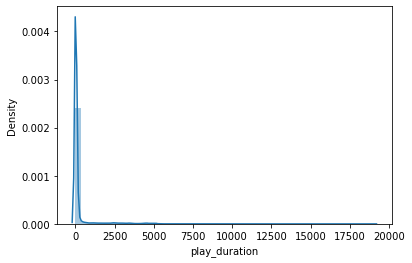

In [19]:
#Checking the density of the Data
sns.distplot(new['play_duration'])


Text(0.5, 1.0, 'pearson correlation')

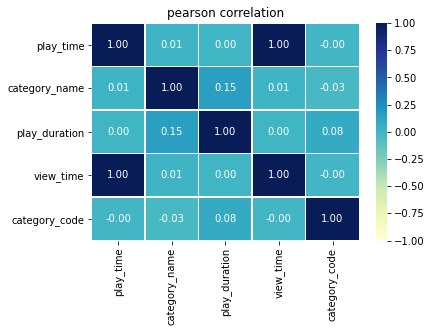

In [20]:

#Checking the corelation
corr_matrix = new.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

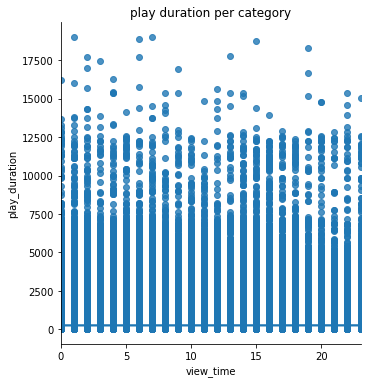

In [21]:
#Checking the outlier
sns.lmplot( 'view_time','play_duration', data=new);
plt.title('play duration per category');

The density is to close to 0 values. therefore I have to check again and consider to delete data with play duration that is too short and also to minimize the noise. There are some outliers but not much so we are going to delete it

# Reprocessing Data (Cleansing )

Since the data according to EDA contains much 0 value and the variates is really diverse. The data will be reprocessed again to minimize the outliers and narrowing the variance

In [91]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220847 entries, 0 to 742581
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   play_time      220847 non-null  object
 1   category_name  217311 non-null  object
 2   play_duration  220847 non-null  int64 
 3   view_time      220847 non-null  int64 
 4   category_code  220847 non-null  int64 
 5   label          220847 non-null  int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 21.0+ MB


The category_name contains NaN which should be dropped

In [92]:
# Drop the null
new['category_name'].dropna()

0                Movies
3                  News
4                  News
5                  News
6                 Music
              ...      
742573             News
742574             News
742576             News
742577             News
742581    Entertainment
Name: category_name, Length: 217311, dtype: object

In [111]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220847 entries, 0 to 742581
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   play_time      220847 non-null  object
 1   category_name  217311 non-null  object
 2   play_duration  220847 non-null  int64 
 3   view_time      220847 non-null  int64 
 4   category_code  220847 non-null  int64 
 5   label          220847 non-null  int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 21.0+ MB


In [22]:
#drop the criterion
new.drop(new.index[new['play_duration'].between(0, 30)], inplace = True)

In [23]:
#describe the data
new.describe()

,play_duration,view_time,category_code
count,220847.000000,220847.000000,220847.000000
mean,543.290876,9.910504,3.774500
std,1294.793938,6.200300,3.235931
min,31.000000,0.000000,1.000000
25%,48.000000,5.000000,2.000000
50%,69.000000,10.000000,3.000000
75%,152.000000,14.000000,4.000000
max,19001.000000,23.000000,15.000000


In [24]:
#The outlier will be changed to the median. Because the density is right skew
new.loc[new['play_duration'] > 60000, 'play_duration'] = 104
new.describe()

,play_duration,view_time,category_code
count,220847.000000,220847.000000,220847.000000
mean,543.290876,9.910504,3.774500
std,1294.793938,6.200300,3.235931
min,31.000000,0.000000,1.000000
25%,48.000000,5.000000,2.000000
50%,69.000000,10.000000,3.000000
75%,152.000000,14.000000,4.000000
max,19001.000000,23.000000,15.000000


In [25]:
#Import again the package
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

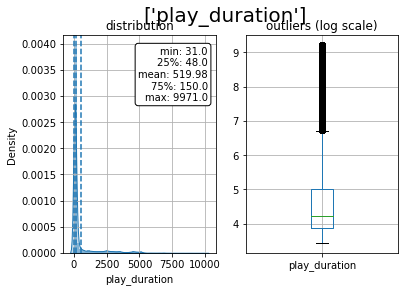

In [93]:
#Checking the distribution again
x=['play_duration']
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(['play_duration'], fontsize=20)
# Distribution of the data
ax[0].title.set_text('distribution')
variable = new['play_duration'].fillna(new['play_duration'].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = new['play_duration'].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(new['play_duration'])
tmp_dtf['play_duration'] = np.log(tmp_dtf['play_duration'])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

Still very much outlier therefore we need to delete the higher outlier to produce more reliable data

In [94]:
#The outlier will be changed to the median. Because the density is right skew
new.loc[new['play_duration'] > 10000, 'play_duration'] = 104
new.describe()

,play_duration,view_time,category_code,label
count,220847.000000,220847.000000,220847.000000,220847.000000
mean,519.978460,9.910504,3.774500,1.585351
std,1189.212519,6.200300,3.235931,1.522349
min,31.000000,0.000000,1.000000,0.000000
25%,48.000000,5.000000,2.000000,0.000000
50%,69.000000,10.000000,3.000000,1.000000
75%,150.000000,14.000000,4.000000,3.000000
max,9971.000000,23.000000,15.000000,4.000000


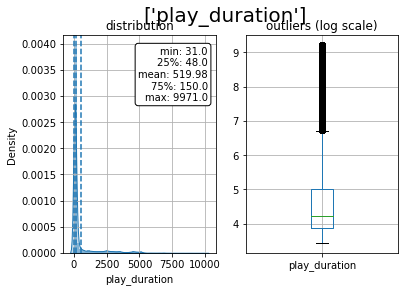

In [95]:
#Checking the distribution again
x=['play_duration']
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(['play_duration'], fontsize=20)
# Distribution of the data
ax[0].title.set_text('distribution')
variable = new['play_duration'].fillna(new['play_duration'].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = new['play_duration'].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(new['play_duration'])
tmp_dtf['play_duration'] = np.log(tmp_dtf['play_duration'])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [29]:
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [96]:
#validating the EDA with chi-square (p-value)
x, y = "view_time", "play_duration"
cont_table = pd.crosstab(index=new[x], columns=new[y])
chi2_test = scipy.stats.chi2_contingency(cont_table)
chi2, p = chi2_test[0], chi2_test[1]
n = cont_table.sum().sum()
phi2 = chi2/n
r,k = cont_table.shape
phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
rcorr = r-((r-1)**2)/(n-1)
kcorr = k-((k-1)**2)/(n-1)
coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")

Cramer Correlation: 0.05 Significant (p-value:0.0)


The p-value is 0.0 which is (p<0.05). Therefore the variable view time and play duration are dependants but low corelation. Now we have more reliable data because according to boxplot there is no outliers. The next step we will perform data visualization

# Data Visualization

Since we only considering bivariate data. Now we are going to visualize the hour it is play duration according to viewing time and the category by group by

In [97]:
#grouping by the category
g1 = new.groupby('view_time').agg({'play_duration':'mean'}).sort_values(['view_time'], ascending=True)
g1.head()

,play_duration
view_time,
0,452.311009
1,491.336275
2,557.906398
3,543.348071
4,575.332824


<AxesSubplot:title={'center':'view time vs play duration'}, xlabel='view_time', ylabel='play_durations'>

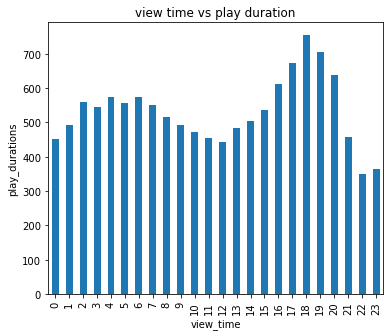

In [98]:
#Graphing the view time vs play duration
dfg = new.groupby(['view_time'])['play_duration'].mean()

dfg.plot(kind='bar', title='view time vs play duration', ylabel='play_durations',
         xlabel='view_time', figsize=(6, 5))

It looks like the most watching time is at 18.00. the least viewer is at 22.00. The interval of the graph is by 1 hour

<AxesSubplot:title={'center':'view time vs play duration'}, xlabel='category_code', ylabel='play_durations'>

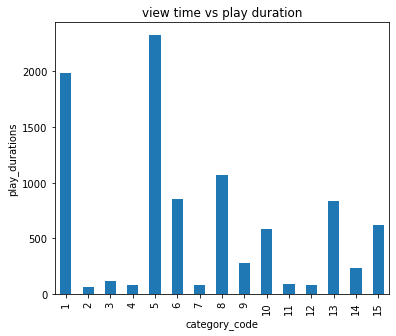

In [99]:
#Graphing the category vs play duration
dfg = new.groupby(['category_code'])['play_duration'].mean()

dfg.plot(kind='bar', title='view time vs play duration', ylabel='play_durations',
         xlabel='category_code', figsize=(6, 5))

The longest duration of viewer is at category number 5 and 1 which that is people tends to watch Movie and TV show at the longest hour

<AxesSubplot:title={'center':'viewer per time'}, xlabel='view_time', ylabel='viewer'>

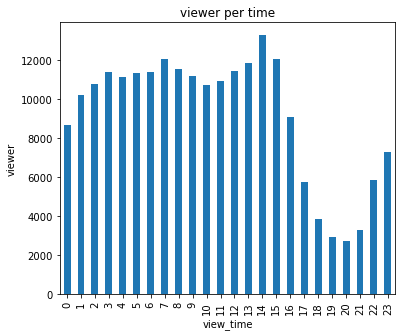

In [100]:
#Graphing the view time vs amount of viewer
dft = new.groupby(['view_time'])['play_duration'].count()

dft.plot(kind='bar', title='viewer per time', ylabel='viewer',
         xlabel='view_time', figsize=(6, 5))

According to the graph the most viewer is in 14.00 followed by 07.00 and 15.00

<AxesSubplot:title={'center':'viewer per category'}, xlabel='category_code', ylabel='viewer'>

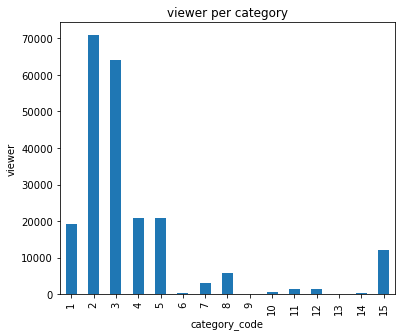

In [101]:
#Graphing the category vs amount of viewer
dft = new.groupby(['category_code'])['play_duration'].count()

dft.plot(kind='bar', title='viewer per category', ylabel='viewer',
         xlabel='category_code', figsize=(6, 5))

According to the graph the most favorite category is number 2 followed by number 3 which they are News and Entertainment

<AxesSubplot:ylabel='play_duration'>

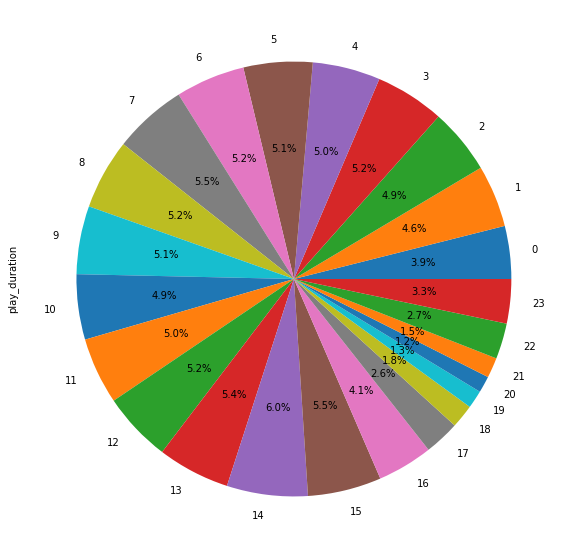

In [102]:
pc=new.groupby("view_time")["play_duration"].count().plot.pie(figsize=(10,10),autopct='%1.1f%%')
pc

according to the piechart the percentage of amount of people watching is relatively same with 6% is the highest percentage

<AxesSubplot:ylabel='play_duration'>

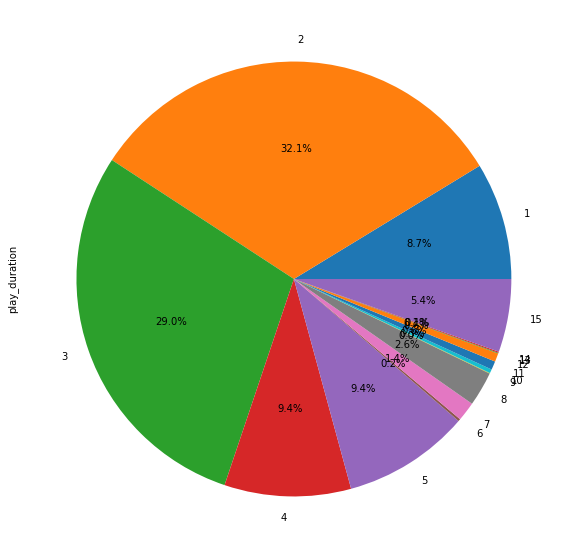

In [103]:
dc=new.groupby("category_code")["play_duration"].count().plot.pie(figsize=(10,10),autopct='%1.1f%%')
dc

The favorite category percentage is relatively significant according to people favorite the top 5 including News that cover 32.1%, Entertainment which cover 29% followed by TV show and Sports which cover 9.4% of the total viewers. The least category according to the viewers amount is number 11 which is Education

# Machine Learning

After doing from preparation to visualization now its proceed to the machine learning. According to the machine learning flow, the data is predicting nor category or numerical therefore we are going to use clustering. The purpose is segmenting based on play duration and category and view time. The modelling that I am going to use is Kmeans. Kmeans is selected to define centrodes that useful for cluster the data. Kmeans is unsupervised machine learning which there is no train or test the data

## K Means clustering

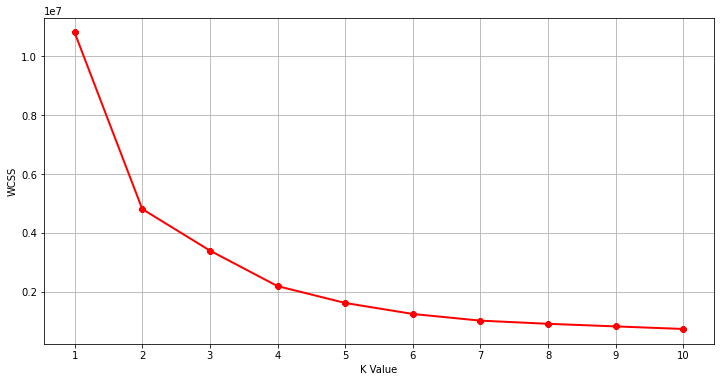

In [104]:
#Define the K-means
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(new[['category_code','view_time']])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [105]:
km = KMeans(n_clusters=5)


In [106]:
clusters = km.fit_predict(new.iloc[:,3:])

In [192]:
new["label"] = clusters

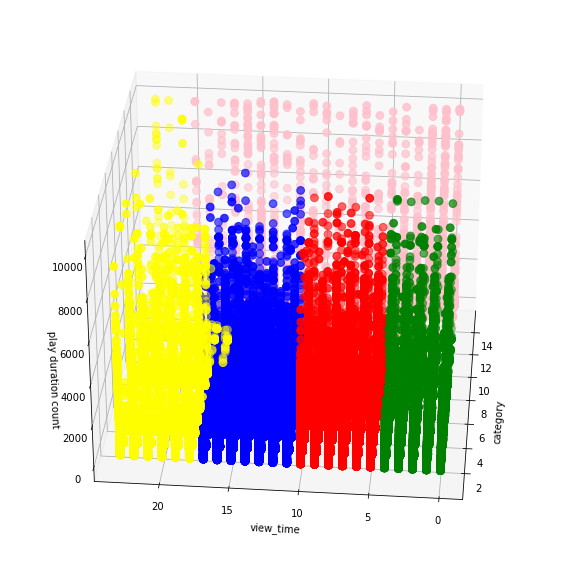

In [108]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new.category_code[new.label == 0],new["view_time"][new.label == 0], new["play_duration"][new.label == 0], c='blue', s=60)
ax.scatter(new.category_code[new.label == 1],new["view_time"][new.label == 1], new["play_duration"][new.label == 1],  c='red', s=60)
ax.scatter(new.category_code[new.label == 2],new["view_time"][new.label == 2], new["play_duration"][new.label == 2],  c='green', s=60)
ax.scatter(new.category_code[new.label == 3],new["view_time"][new.label == 3], new["play_duration"][new.label == 3],  c='pink', s=60)
ax.scatter(new.category_code[new.label == 4],new["view_time"][new.label == 4], new["play_duration"][new.label == 4],  c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel("category")
plt.ylabel("view_time")
ax.set_zlabel('play duration count')
plt.show()

There are clears that the K means has divided into the 5 centrodes. The constelations are :
green = view time(18.00-23.00), 1-15 category
Blue = view time(11.00-17.00), 1-15 category
Red = view time(05.00-10.00), 1 -15 category
yellow = view time(00.00-04.00), 1- 15 category
pink = view time(00.00-20.00), category number 15
However the size of the data is very high >100K. Therefore we can try the K means mini batch clustering to validating the Kmeans and clustering more

## Mini Batch K-means Clustering

Since the Kmeans clustering returns very crowded scatter and it is hard to determine, I consider to try with Mini Batch Clustering. Mini batch K-means clustering is a clustering method with K-means which the data iterated into minimum sample regardless of its variances. 

In [181]:
# Change the dataset into numpy
cat = new.to_numpy()

In [182]:
cat

array([[1263,   12,    1],
       [  53,    6,    2],
       [  53,    1,    2],
       ...,
       [  51,   23,    2],
       [  38,   10,    2],
       [  43,    1,    3]], dtype=int64)

In [249]:
# Applying Kmeans to the mini batch
model = MiniBatchKMeans(n_clusters=5)

The clusters is 5 which gathered from the elbow K-means which returns the amount of Kmeans is 5

In [250]:
# Fit the model
model.fit(cat)

MiniBatchKMeans(n_clusters=5)

In [251]:
# Define the model
yhat = model.predict(cat)

In [252]:
clusters = unique(yhat)

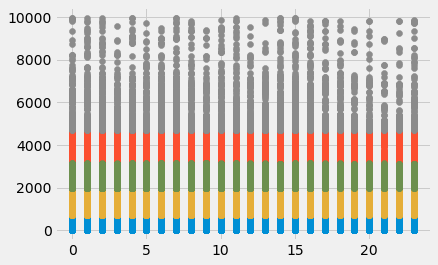

In [266]:
# Plotting the cluster
for cluster in clusters:
# get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
# create scatter of these samples
    pyplot.scatter( cat[row_ix, 1], cat[row_ix, 0])
# show the plot
pyplot.show()

The plot shown relation between X= view hour, Y = Playing duration. According to the plot, It is only clustered with Y Axis. The explanation of the results is shown below:
- Blue = approximately clustered the duration below 600 seconds
- Yellow = approximately clustered the duration between 601 to 2000 seconds
- Green = approximately clustered the duration between 2001 to 3600 seconds
- Red = approximately clustered the duration between 3601 to 4500 seconds
- Grey = approximately clustered the duration above 4500 seconds

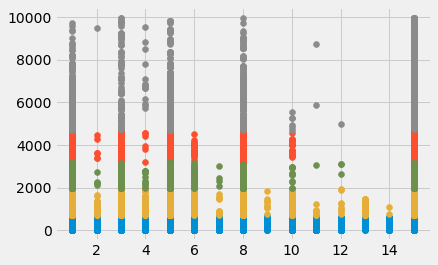

In [271]:
for cluster in clusters:
# get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
# create scatter of these samples
    pyplot.scatter( cat[row_ix, 2], cat[row_ix, 0])
# show the plot
pyplot.show()

The plot shown relation between X= category, Y = Playing duration. According to the plot, It is only clustered with Y Axis. The explanation of the results is shown below:
- Blue = approximately clustered the duration below 600 seconds
- Yellow = approximately clustered the duration between 601 to 2000 seconds
- Green = approximately clustered the duration between 2001 to 3600 seconds
- Red = approximately clustered the duration between 3601 to 4500 seconds
- Grey = approximately clustered the duration above 4500 seconds

The clustering only based on Y axis however the plot that uniformly formed we can consider the most popular category is number 15 which is Music that can be clustered in all plot

Number 13 and 14 which is Education and Webtoon is the least popular and no one will watch above 2000 seconds

# Conclusion

   The Data that is predicted is between categorical and numerical which are not encoded with specific series. It is clear that the machine learning that is going to use is Clustering. According to the visualization the most watcher is at 18.00 and the most watched category is News. However according to the play duration Music is the most viable on the data. The data is limited to maximum 10000 seconds to minimize the noise of the data because we are only clustering to determine the viewer amount per view time and category. When I am using the Kmeans the data is really crowded and cannot be interpreted clearly, therefore I have used Minibatch K means which is effective for data above 100K elements